<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is02_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with MPG dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget https://gist.githubusercontent.com/wmeints/80c1ba22ceeb7a29a0e5e979f0b0afba/raw/8629fe51f0e7642fc5e05567130807b02a93af5e/auto-mpg.csv

--2024-10-12 08:09:23--  https://gist.githubusercontent.com/wmeints/80c1ba22ceeb7a29a0e5e979f0b0afba/raw/8629fe51f0e7642fc5e05567130807b02a93af5e/auto-mpg.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17732 (17K) [text/plain]
Saving to: ‘auto-mpg.csv.1’

auto-mpg.csv.1      100%[===================>]  17.32K  --.-KB/s    in 0s      

2024-10-12 08:09:23 (101 MB/s) - ‘auto-mpg.csv.1’ saved [17732/17732]



In [15]:
# Load the dataset from the uploaded file
file_path = 'auto-mpg.csv'
auto_mpg = pd.read_csv(file_path)
# Clean the data: convert horsepower to numeric and drop any rows with missing values
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')
auto_mpg_clean = auto_mpg.dropna(subset=['horsepower', 'mpg'])
auto_mpg_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


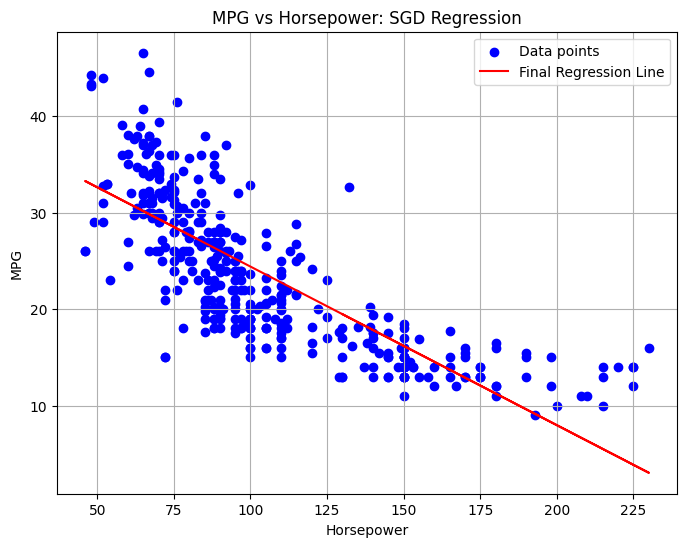

Final slope (a): -0.1644551982198396
Final intercept (b): 40.861596113008176


In [29]:
# Define X (horsepower) and y (MPG)
X_original = auto_mpg_clean['horsepower'].values
y = auto_mpg_clean['mpg'].values


# Normalize the features (standardize to mean 0, std 1)
X_mean = np.mean(X_original)
X_std = np.std(X_original)
X = (X_original - X_mean) / X_std

# Initialize parameters
a = 0.0  # slope
b = 0.0  # intercept

# Reduced learning rate to prevent divergence
alpha = 0.0005

# Number of iterations (epochs)
iterations = 100
n = len(X)  # Number of data points

# Plot setup
plt.figure(figsize=(8,6))
plt.scatter(X_original, y, color='blue', label='Data points')

# Perform SGD for a given number of iterations
for iteration in range(iterations):
    for i in range(n):
        # Select one data point at a time (SGD)
        x_i = X[i]
        y_i = y[i]

        # Prediction for this data point
        y_pred = a * x_i + b

        # Compute gradients for a and b
        grad_a = -2 * (y_i - y_pred) * x_i
        grad_b = -2 * (y_i - y_pred)

        # Update the parameters using the gradients
        a = a - alpha * grad_a
        b = b - alpha * grad_b

# Denormalize the parameters
a_original = a / X_std
b_original = b - a * (X_mean / X_std)

# Plot the regression line based on the denormalized parameters
y_pred_line = a_original * X_original + b_original
plt.plot(X_original, y_pred_line, color='red', label='Final Regression Line')

# Final plot settings
plt.title('MPG vs Horsepower: SGD Regression')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()

# Print the final regression parameters in the original scale
print(f"Final slope (a): {a_original}")
print(f"Final intercept (b): {b_original}")

In [30]:
print(a,b)

-6.321992110024474 23.681062241837587
